In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("datasets/ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [8]:
df.shape

(294478, 5)

In [10]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [12]:
df.query('group ==  "control" and landing_page == "new_page"')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [14]:
df.query('group == "treatment" and landing_page == "old_page"')

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [16]:
df_control = df.query('group == "control" and landing_page == "old_page"')
df_treatment = df.query('group == "treatment" and landing_page == "new_page"')
clean_df = df_control.merge(df_treatment, how="outer")
clean_df.head()

,user_id,timestamp,group,landing_page,converted
0,630000,2017-01-19 06:26:06.548941,treatment,new_page,0
1,630001,2017-01-16 03:16:42.560309,treatment,new_page,1
2,630002,2017-01-19 19:20:56.438330,control,old_page,0
3,630003,2017-01-12 10:09:31.510471,treatment,new_page,0
4,630004,2017-01-18 20:23:58.824994,treatment,new_page,0


In [20]:
clean_df.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [24]:
sum(clean_df["user_id"].duplicated())

1

In [36]:
clean_df[clean_df["user_id"].duplicated(keep="first")]

,user_id,timestamp,group,landing_page,converted
131713,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [38]:
clean_df = clean_df[~clean_df["user_id"].duplicated(keep="first")]

In [40]:
clean_df.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [42]:
clean_df_control = clean_df.query('group == "control"')
clean_df_treatment = clean_df.query('group == "treatment"')

In [46]:
new_page_converted_test = np.random.binomial(len(clean_df_treatment), clean_df["converted"].mean(), 10000) / len(df_treatment)
old_page_converted_test = np.random.binomial(len(clean_df_control), clean_df["converted"].mean(), 10000) / len(df_control)

In [52]:
p_diffs = new_page_converted_test - old_page_converted_test

In [54]:
p_diffs.mean()

-1.3179606979829645e-06

In [56]:
ab_data_diff = clean_df_treatment["converted"].mean() - clean_df_control["converted"].mean()
ab_data_diff

-0.0015782389853555567

In [64]:
(p_diffs > ab_data_diff).mean() * 100

90.64999999999999

In [68]:
# our p value
(p_diffs < ab_data_diff).mean() * 100

9.35

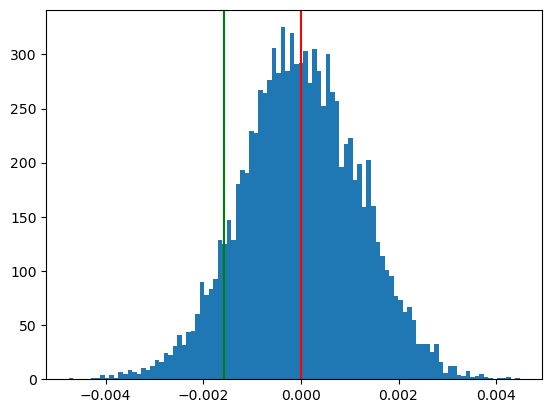

In [70]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
high = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=high, color='r')